*Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе входных параметров, таких как пол, возраст, заболевания, медицинские показатели и др.*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv", usecols = lambda x: x != "id")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


* `gender` — пол пациента
* `age` — возраст пациента
* `hypertension` — наличие гипертонии у пациента
* `heart_disease` — наличие заболеваний сердца у пациента
* `ever_married` — состоит ли в браке пациент
* `work_type` — тип работы пациента
* `Residence_type` — тип местности, где проживает пациент
* `avg_glucose_level` — средний уровень глюкозы в крови у пациента
* `bmi` — индекс массы тела пациента
* `smoking_status` — статус курения пациента
* `stroke` — был ли инсульт у пациента

In [6]:
numerical = ["age", "avg_glucose_level", "bmi"]
categorical = [column for column in df.columns if (column not in numerical)]

Мода для столбца gender: Female


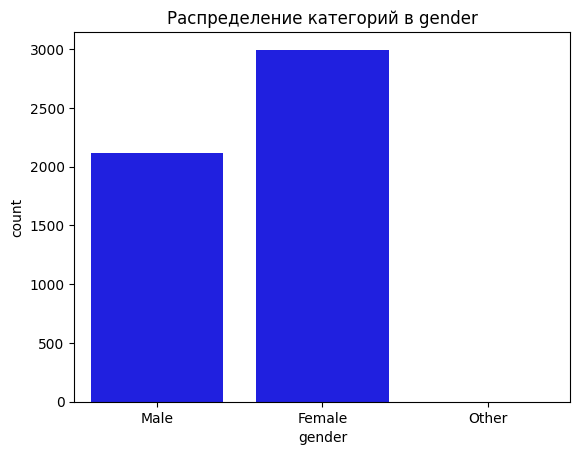

Среднее для age: 43.226614481409
Мода для столбца age: 78.0
Медиана для age: 45.0
Стандартное отклонение для age: 22.61264672311349
Минимальное значение для age: 0.08
Максимальное значение для age: 82.0


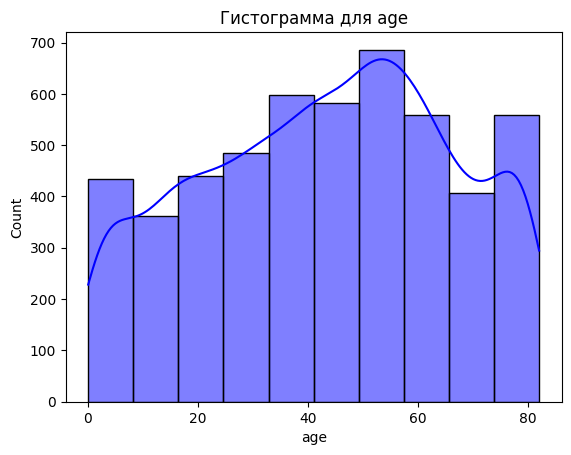

Мода для столбца hypertension: 0


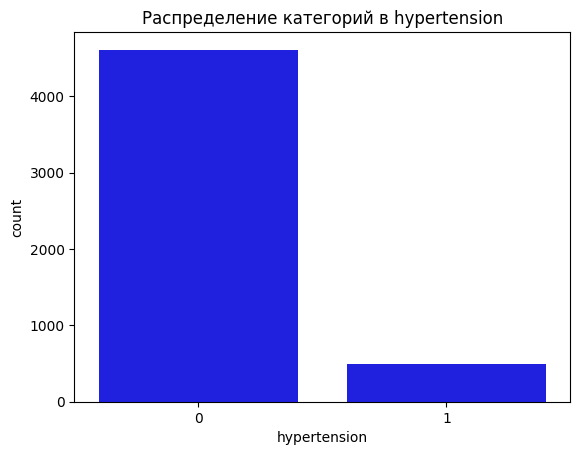

Мода для столбца heart_disease: 0


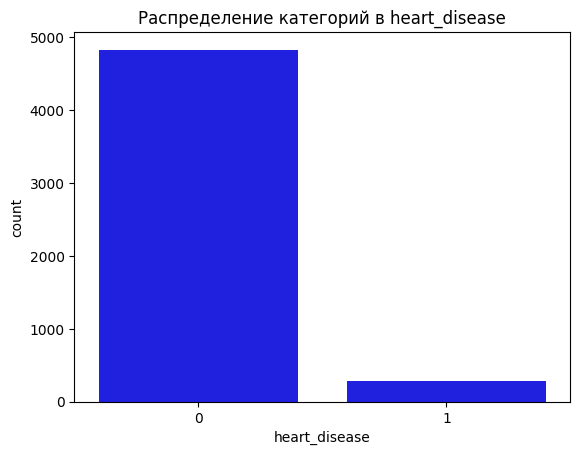

Мода для столбца ever_married: Yes


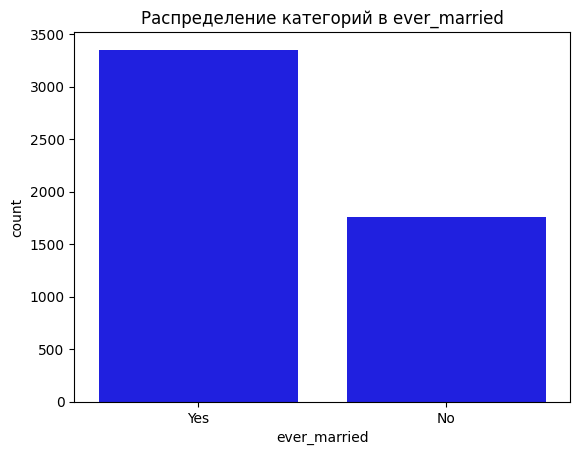

Мода для столбца work_type: Private


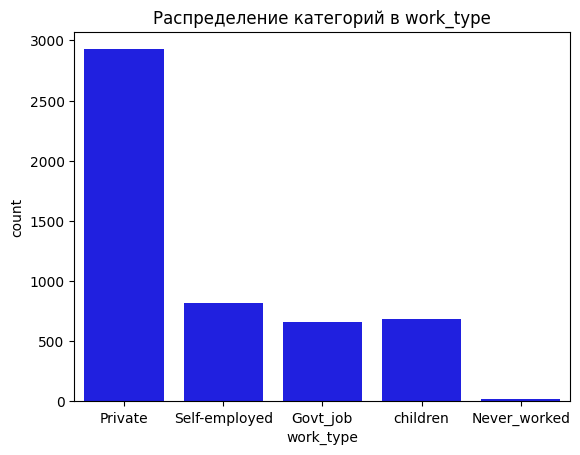

Мода для столбца Residence_type: Urban


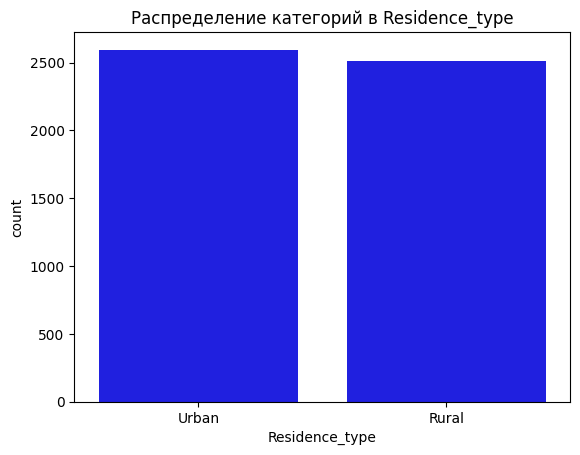

Среднее для avg_glucose_level: 106.1476771037182
Мода для столбца avg_glucose_level: 93.88
Медиана для avg_glucose_level: 91.88499999999999
Стандартное отклонение для avg_glucose_level: 45.28356015058198
Минимальное значение для avg_glucose_level: 55.12
Максимальное значение для avg_glucose_level: 271.74


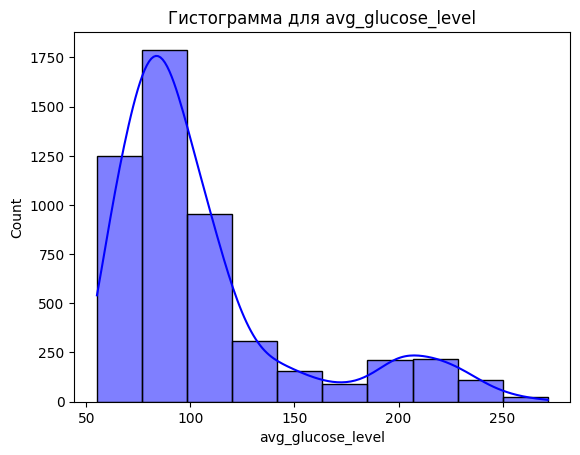

Среднее для bmi: 28.893236911794666
Мода для столбца bmi: 28.7
Медиана для bmi: 28.1
Стандартное отклонение для bmi: 7.854066729680164
Минимальное значение для bmi: 10.3
Максимальное значение для bmi: 97.6


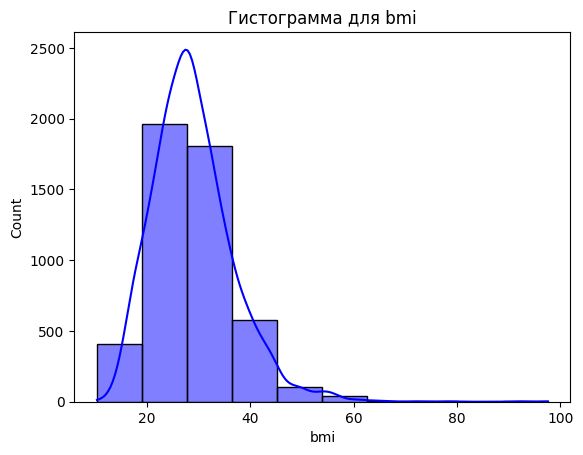

Мода для столбца smoking_status: never smoked


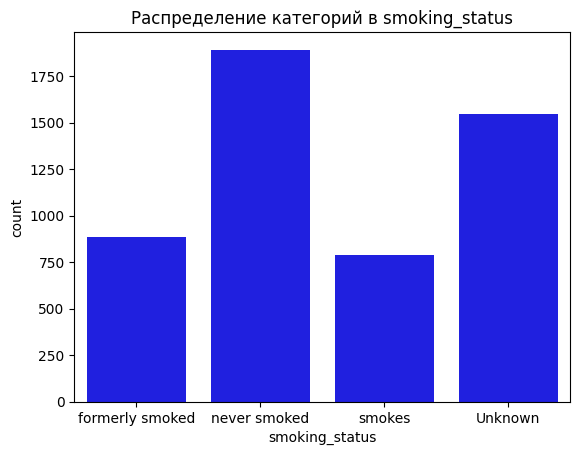

Мода для столбца stroke: 0


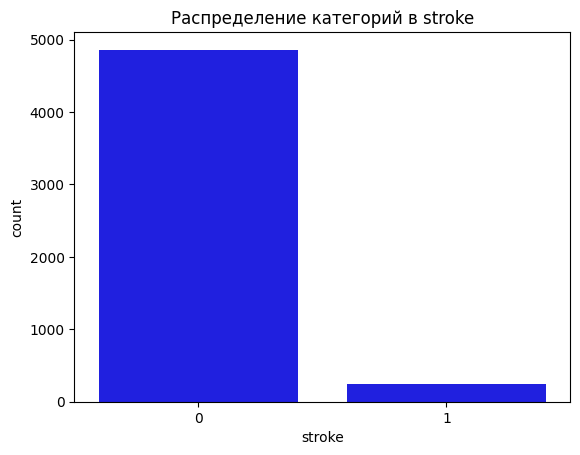

In [7]:
for column in df.columns:
    if (column not in numerical):
        mode_value = df[column].mode()[0]
        print(f"Мода для столбца {column}: {mode_value}")

        sns.countplot(data = df, x = column, color = "blue")
        plt.title(f"Распределение категорий в {column}")
        plt.show()
    else:
        mean_value = df[column].mean()
        mode_value = df[column].mode()[0]
        median_value = df[column].median()
        std_dev = df[column].std()
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"Среднее для {column}: {mean_value}")
        print(f"Мода для столбца {column}: {mode_value}")
        print(f"Медиана для {column}: {median_value}")
        print(f"Стандартное отклонение для {column}: {std_dev}")
        print(f"Минимальное значение для {column}: {min_value}")
        print(f"Максимальное значение для {column}: {max_value}")

        sns.histplot(df[column], bins = 10, color = "blue", kde=True)
        plt.title(f"Гистограмма для {column}")
        plt.show()

In [8]:
df[df["gender"] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


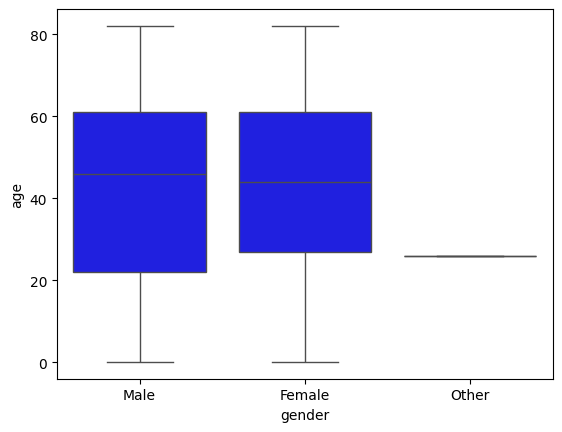

In [9]:
sns.boxplot(x = "gender", y = "age", color = "blue", data = df)
plt.show()

In [10]:
df[df["age"] == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [11]:
df[df["work_type"] == "children"].shape[0] / df.shape[0]

0.1344422700587084

In [12]:
df[df["work_type"] == "children"]["age"].max()

np.float64(16.0)

In [13]:
df[df["work_type"] == "Never_worked"]["age"].min()

np.float64(13.0)

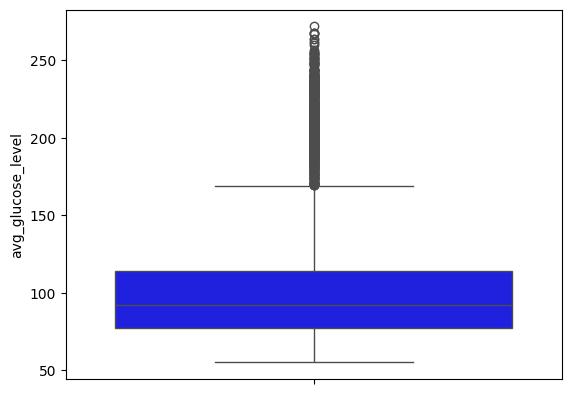

In [14]:
sns.boxplot(df["avg_glucose_level"], color = "blue")
plt.show()

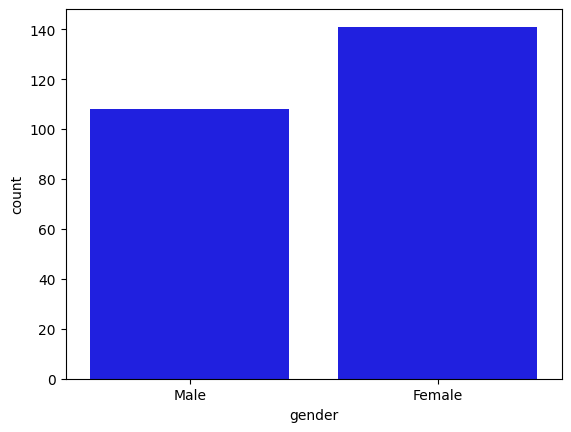

In [15]:
sns.countplot(x="gender", color = "blue", data=df[df["stroke"] == 1])
plt.show()

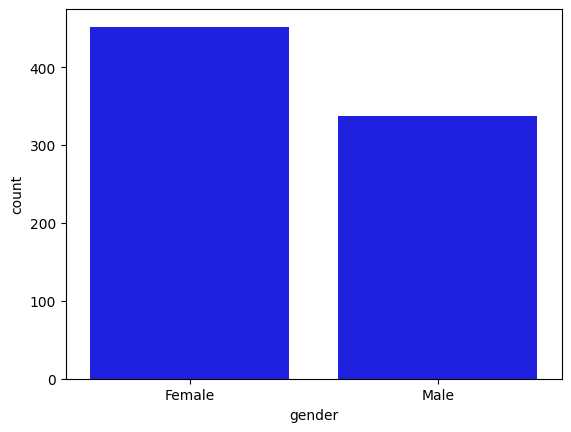

In [16]:
sns.countplot(x="gender", color = "blue", data=df[df["smoking_status"] == "smokes"])
plt.show()

*Из полученных графиков и вычисленных характеристик можно понять, что в выборке больше женщин, чем мужчин, а также есть выброс с полом "Другое". Возраст пациентов около **45** лет, и медианный возраст мужчин и женщин практически совпадает. Есть два человека с возрастом **0.08**, что похоже на выброс, но boxplot не выделяет такие данные, как выброс. Большая часть людей, которые присутствуют в выборке, имеют возраст **78** лет. Практически у всех пациентов нет гипертонии. $\frac{2}{3}$ пациентов состоят в браке. Большая часть пациентов не предоставили информацию о работе, в статистике в соответствии с указанным респондентами возрастом присутствует $13\%$ детей, и можно предположить, что большая часть людей, которые имеют статус **Never_worked**, являются детьми. Количество людей из города и деревни приблизительно равно. Присутствует много выбросов, связанных со средним уровнем глюкозы. Если опираться на данные из интернета, то можно сделать вывод, что индекс массы тела, равный **28.7** (а в нашем случае - это значение имеет большая часть людей), является показателем избыточного веса. Большая часть людей либо никогда не курили, либо не указали эти данные, а из тех, кто курит, больше всего женщин, возможно, это связано с тем, что женщин в данных больше. И мы видим, что больше всего в выборке людей, у которых не было инсультов, а среди тех, у кого были инсульты, преобладают женщины.*

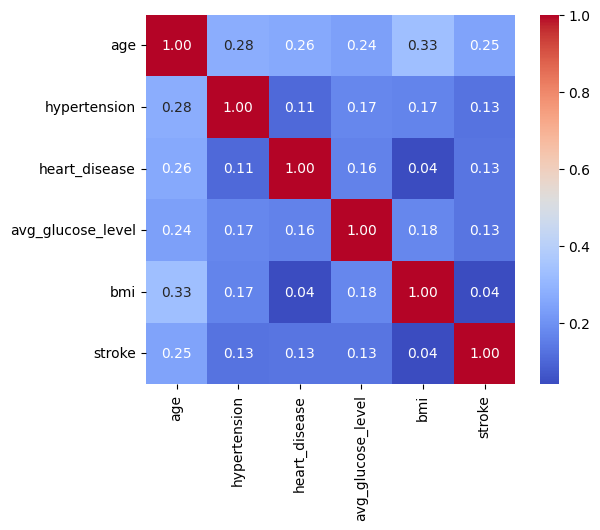

In [17]:
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, square = True, annot = True, fmt = '.2f', cmap = "coolwarm")
plt.show()

*По корреляционной матрице видно, что почти ничего ни с чем не коррелирует, максимальное значение **0.33** между возрастом и индексом массы тела*

*Проверим данные на пропущенные значения*

In [18]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*Заполним пропущенные значения в столбце bmi медианой, так как она более устойчива к выбросам, чем среднее значение*

In [19]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

*Воспользуемся OneHotEncoder для того, чтобы избавиться от категориальных данных, также можно выбросить в каждом категориальном столбце первый класс, чтобы избежать линейной зависимости*

In [20]:
encoder = OneHotEncoder(drop = "first")
encoded_features = encoder.fit_transform(df[categorical[:-1]])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(categorical[:-1]))
df = pd.concat([df.drop(columns = categorical[:-1]), encoded_df], axis = 1)

In [21]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,61.0,202.21,28.1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,105.92,32.5,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,171.23,34.4,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,79.0,174.12,24.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


*Начнём готовить выборку к обучению*

In [22]:
X = df.drop("stroke", axis = 1)
y = df["stroke"]

*Поделим выборку на тестовую и тренировочную*

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

*Выполним нормализацию*

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

*Воспользуемся логистической регрессией, так как она корректно оценивает вероятности*

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)

score_lr_train = lr.score(X_train, y_train)
score_lr_test = lr.score(X_test, y_test)

score_lr_train, score_lr_test

(0.9515655577299413, 0.9510763209393346)

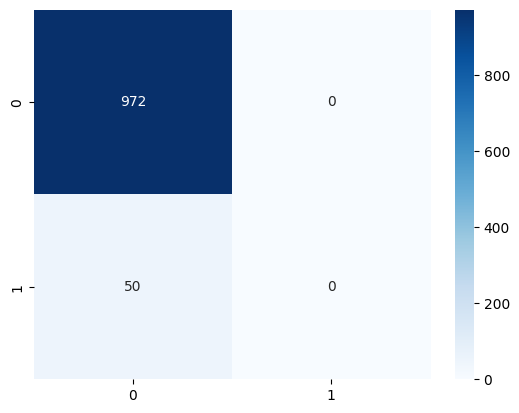

In [27]:
con_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(con_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.show()

*Можно увидеть, что наша модель всегда выдаёт константный ответ (0), так как присутствует сильный дисбаланс классов*

*Попробуем использовать метод k ближайших соседей и подобрать параметр для него с помощью GridSearch*

In [28]:
param_grid = {"n_neighbors": range(1, 21)}

knn_ = KNeighborsClassifier()
grid_search = GridSearchCV(knn_, param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [29]:
best_k = grid_search.best_params_["n_neighbors"]
print(f"Оптимальное значение соседей: {best_k}")

Оптимальное значение соседей: 4


In [30]:
knn = grid_search.best_estimator_

score_knn_train = lr.score(X_train, y_train)
score_knn_test = lr.score(X_test, y_test)

score_knn_train, score_knn_test

(0.9515655577299413, 0.9510763209393346)

In [31]:
y_pred = knn.predict(X_test)
np.sum(y_pred)

np.int64(0)

*Можно увидеть, что данный метод тоже выдаёт константное предсказание*

*Приходим к выводу, что данные методы не подходят для этих данных, так как из-за большого количества людей без инсульта мы не можем нормально обучить модель и предсказывать, когда и с какой вероятностью инсульт может случиться у пациента*